# Principal Component Analysis

### 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


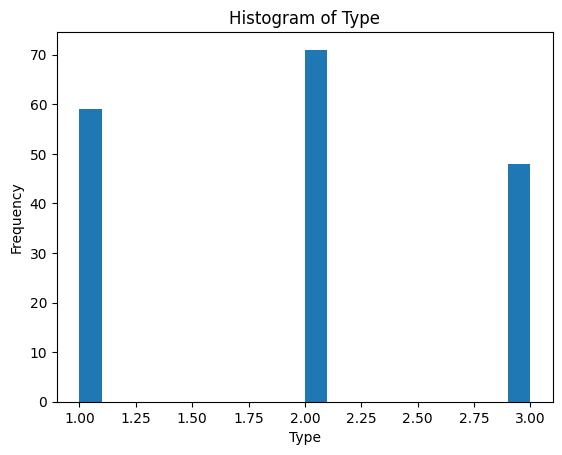

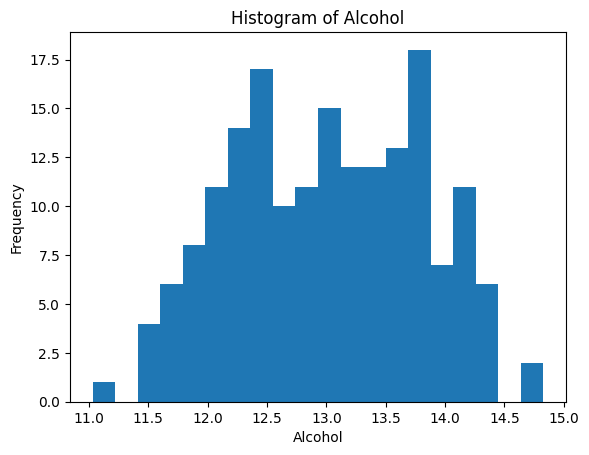

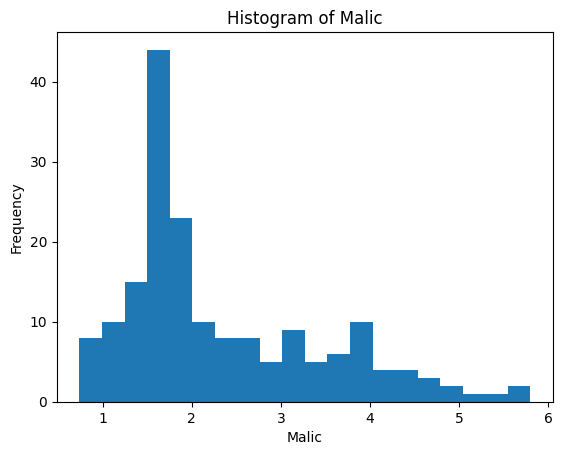

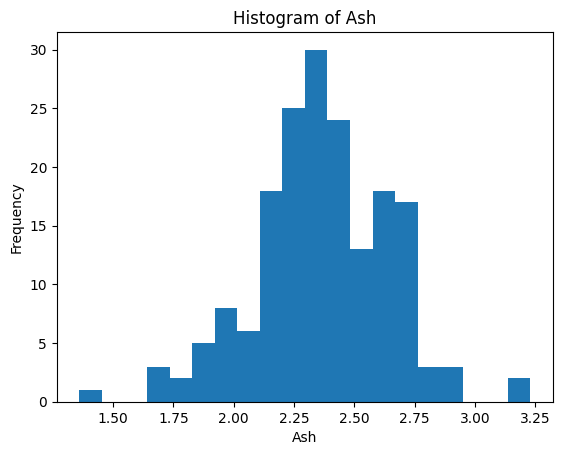

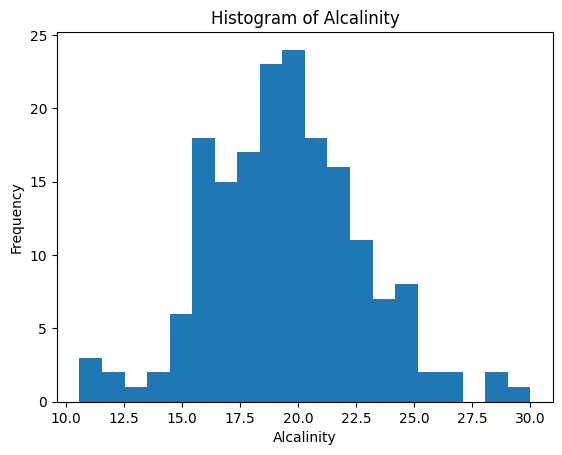

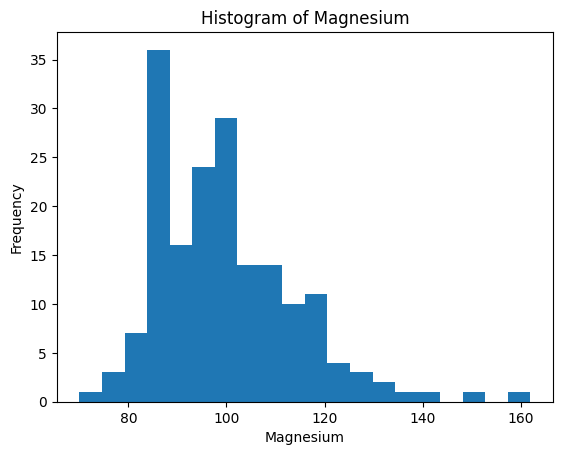

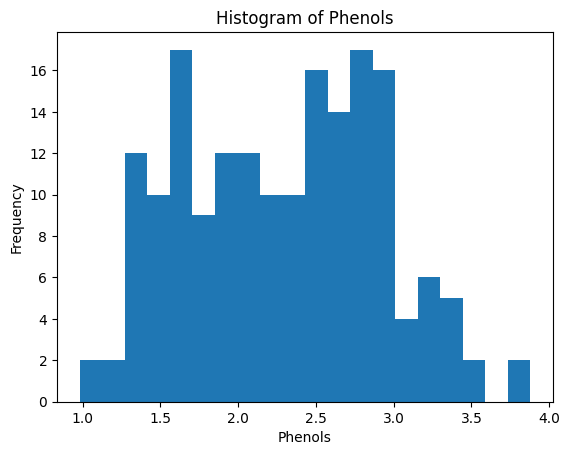

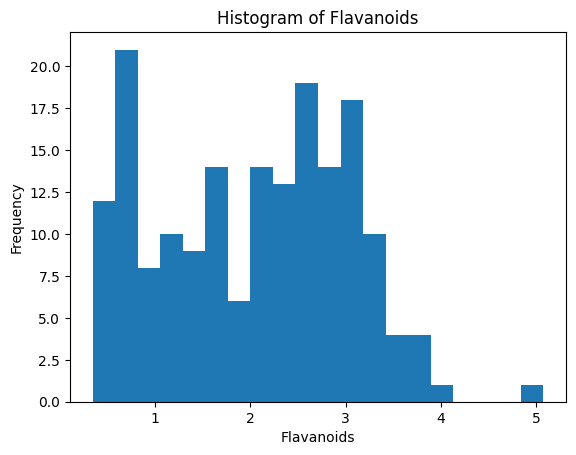

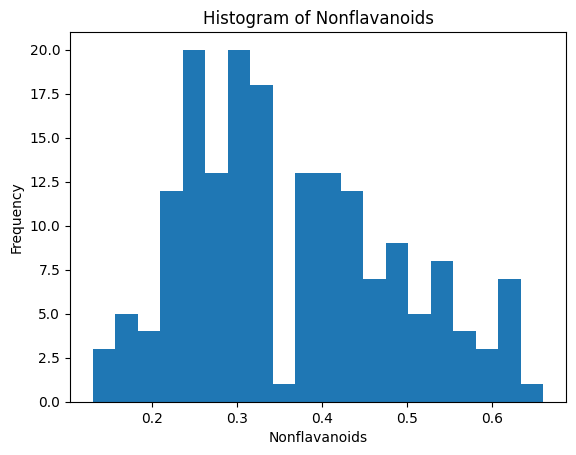

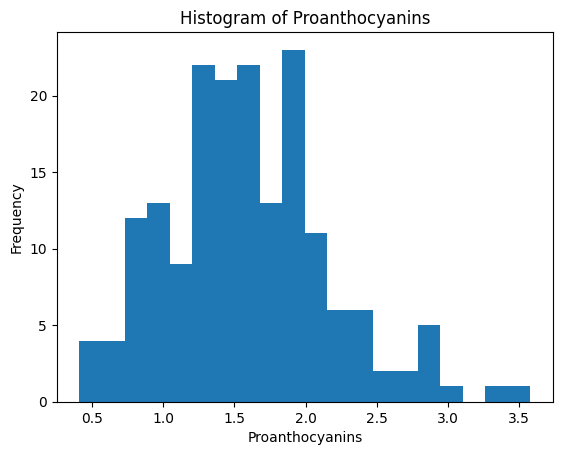

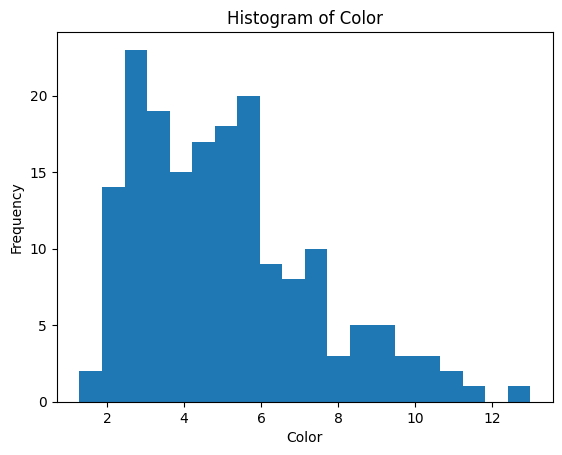

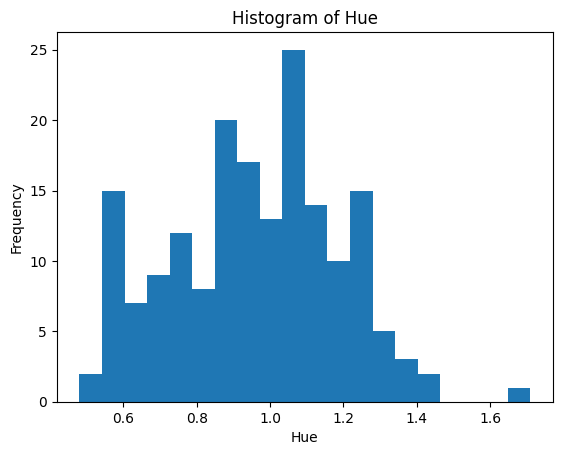

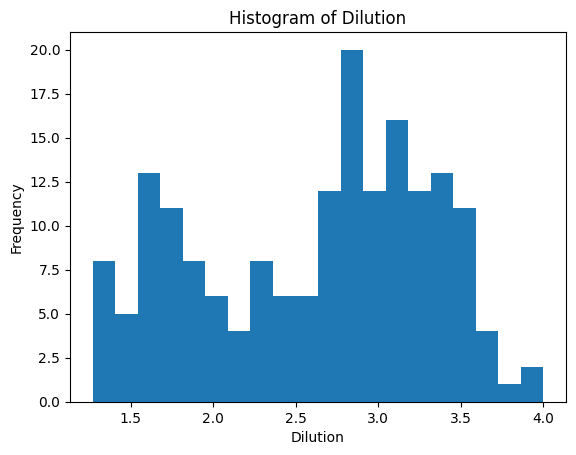

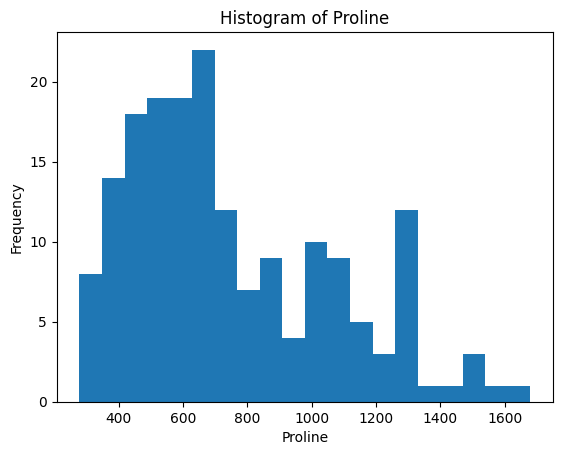

In [6]:
#feature distribution Analysis
#histogram

num_cols=df.columns
for col in num_cols:
  plt.figure()
  plt.hist(df[col], bins=20)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

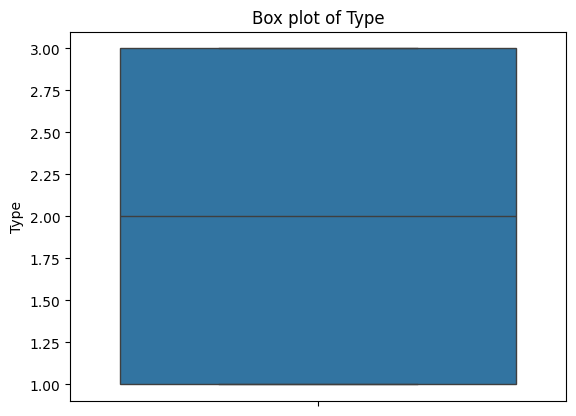

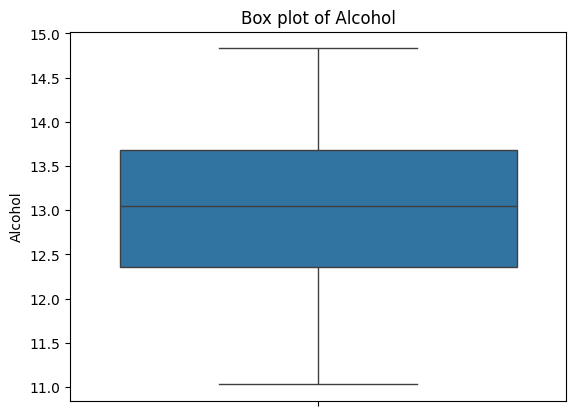

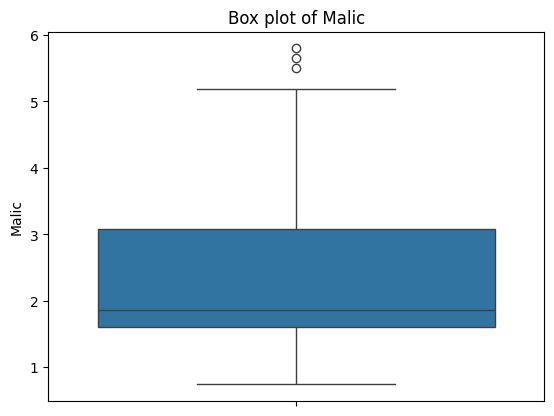

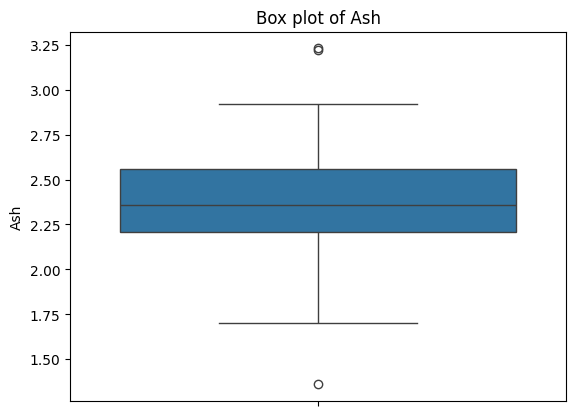

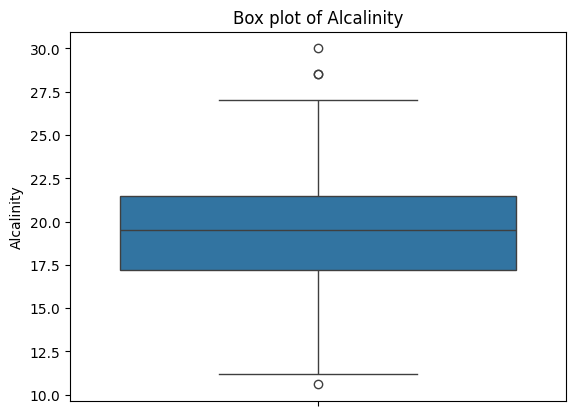

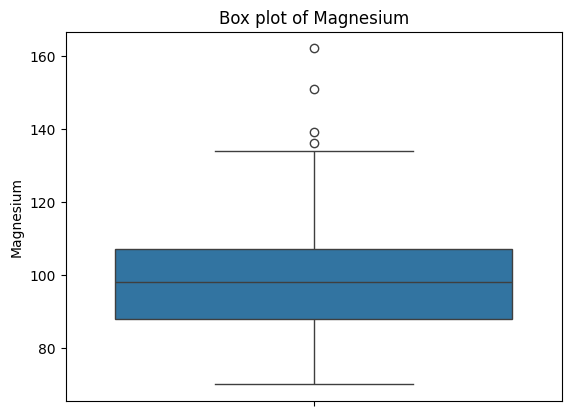

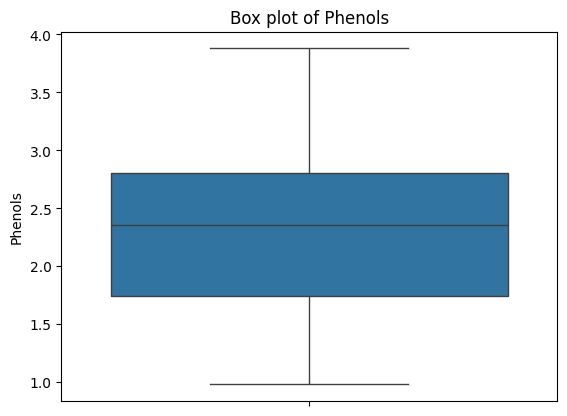

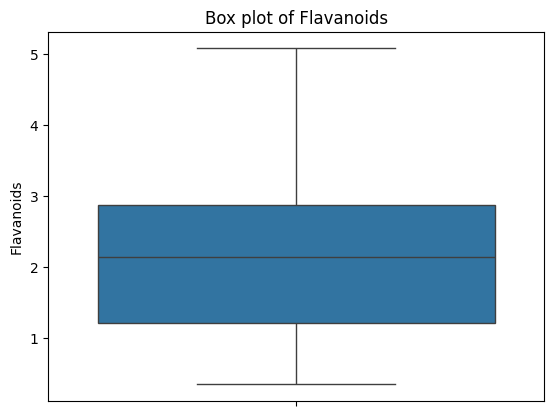

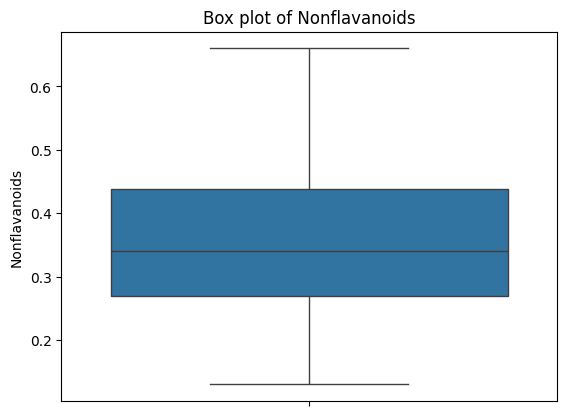

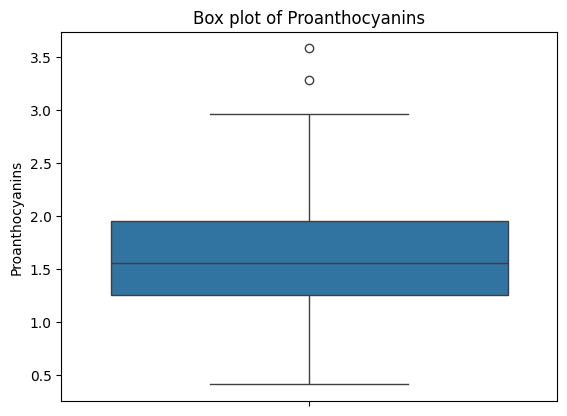

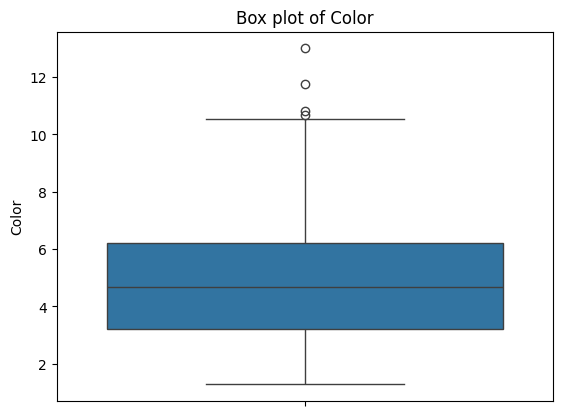

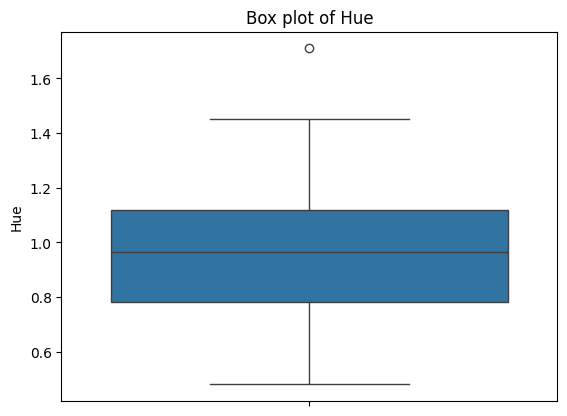

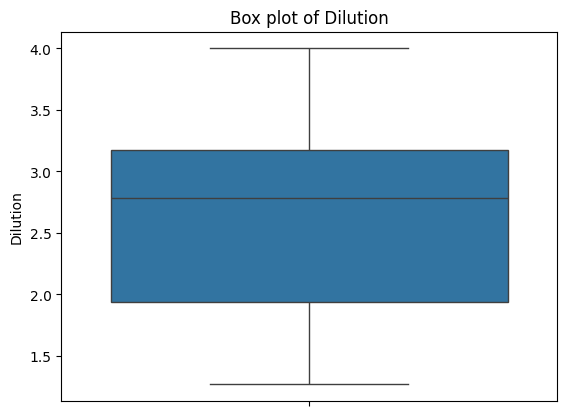

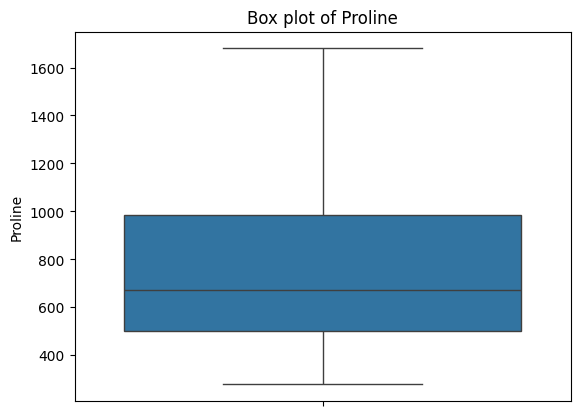

In [7]:
# box plots
for col in num_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f'Box plot of {col}')
  plt.ylabel(col)
  plt.show()

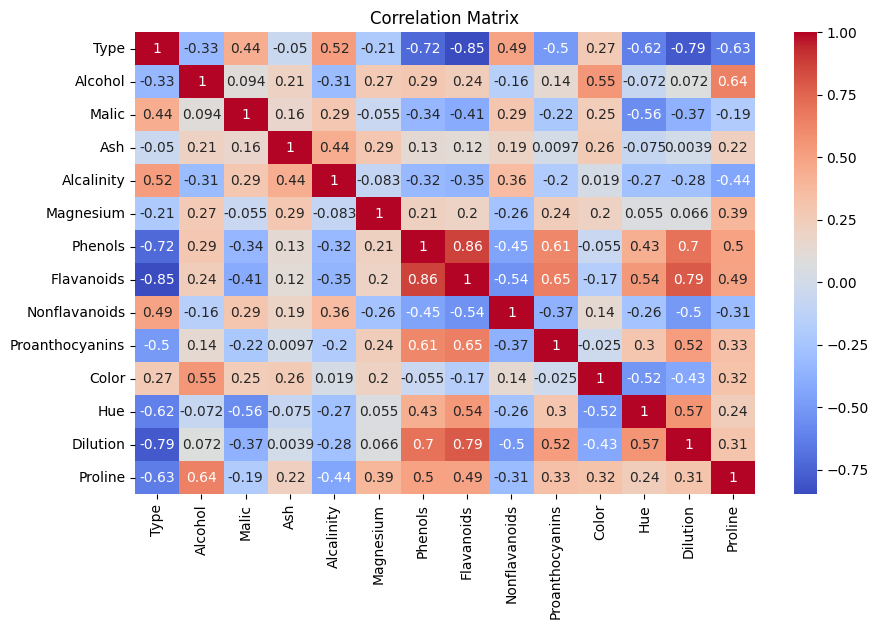

In [9]:
# Correlation Analysis - important because highly correlated features indicate redundancy
# PCA reduces dimensionality by combining correlated features
# Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 2. Dimensionality Reduction with PCA

In [11]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler
X=df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Implementing PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

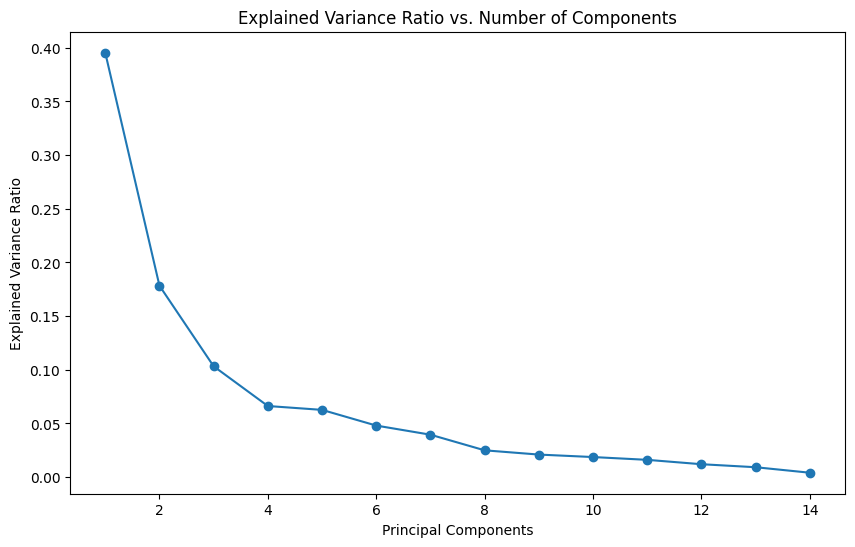

In [13]:
# determining the optimal number of principle components
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [15]:
# transforming dataset using optimal number of components
pca_optimal = PCA(n_components=2)
X_PCA_final=pca_optimal.fit_transform(X_scaled)

X_PCA_final.shape

(178, 2)

In [16]:
pca_df = pd.DataFrame(X_PCA_final, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


PCA was applied after standardization, and the optimal number of components was selected using explained variance analysis before transforming the data into principal components.

### 3. Clustering with Original Data

In [17]:
#standardizing original data
X_original_scaled = scaler.fit_transform(df)

In [18]:
#Applying K-means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_original_scaled)

#adding clusters to the dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

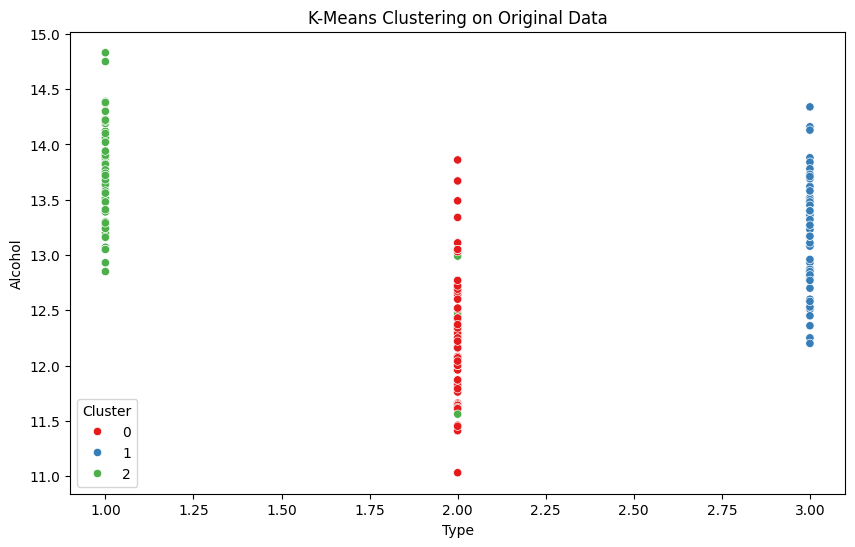

In [19]:
# Visualizing clustering results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=clusters, palette='Set1')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means Clustering on Original Data')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Evaluating Clustering Performance
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(X_original_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.30648398324833453


* Higher value → better-defined clusters
* Value > 0.5 indicates good clustering

In [23]:
db_index = davies_bouldin_score(X_original_scaled, clusters)
print('Davies-Bouldin Index:', db_index)

Davies-Bouldin Index: 1.315707552261773


* Lower value → better clustering
* Measures cluster compactness and separation

K-Means clustering was applied to the original dataset, visualized using scatter plots, and evaluated using silhouette score and Davies–Bouldin index.

### 4. Clustering with PCA Data

In [24]:
#applying kmeans on pca data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_PCA_final)

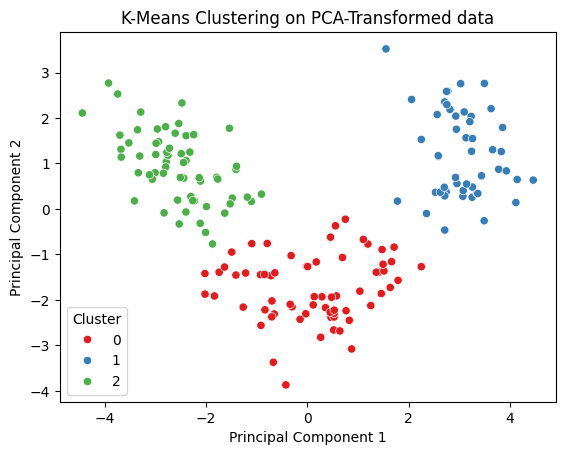

In [28]:
# Visualizing Clustering Results on PCA Data
sns.scatterplot(x=X_PCA_final[:,0],
                y=X_PCA_final[:,1], hue=clusters_pca,
                palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed data')
plt.legend(title='Cluster')
plt.show()

In [29]:
#Evaluating the results
sil_score_pca = silhouette_score(X_PCA_final, clusters_pca)
print("Silhouette Score (PCA):", sil_score_pca)

Silhouette Score (PCA): 0.6024415520362845


In [30]:
db_index_pca = davies_bouldin_score(X_PCA_final, clusters_pca)
print('Davies-Bouldin Index (PCA):', db_index_pca)

Davies-Bouldin Index (PCA): 0.5397078562575713


Clustering on Original Data:
* Dimensionality High
* Visualization is difficult
* Lower Silhuoette score
* Higher db index

Clustering on PCA Data:
* Reduced(2d) dimensionality
* Clear Visualization
* Higher Silhuoette score
* Lower db index

* Here PCA removes edundant and correlated features, improving cluster compactness.
* Clustering on PCA data yields better-defined clusters.
* Visual interpretation is significantly easier after PCA.
* PCA enhances clustering performance while reducing dimensionality.

### 5. Comparision and Analysis

Clustering on Original Data:
* Original data clustering exhibited moderate cluster overlap due to high dimensionality and correlated features.
* Silhouette score was lower for original data based clustering,not indicating better-defined clusters.

Clustering on PCA Data:
* PCA-based clustering produced more compact and well-separated clusters, as visualized clearly in the 2-D principal component space.
* Silhouette score was higher for PCA-based clustering, indicating better-defined clusters.
* Davies–Bouldin index was lower after PCA, suggesting improved cluster compactness and separation.

Similarities:
* The same number of clusters was identified in both approaches.

* Overall grouping patterns remained consistent, indicating that PCA preserved the essential structure of the data.

* Both methods successfully partitioned the dataset into meaningful clusters.

Differences:
* PCA-based clustering showed clearer boundaries between clusters.

* Original data clustering suffered from overlapping clusters due to noise and redundant features.

* Visualization was significantly more intuitive after PCA.

Dimensionality reduction using PCA had a positive impact on clustering performance by:

* Removing redundant and highly correlated features.

* Reducing noise in the data.

* Concentrating the most important variance into fewer dimensions.

As a result, the clustering algorithm was able to focus on the most informative aspects of the data, leading to improved performance metrics and clearer cluster separation.

Trade-off Analysis:
* Using PCA improves clustering quality and visualization but reduces direct interpretability since principal components are combinations of original features.

* Clustering on original data preserves full feature information but may suffer from noise, redundancy, and poor visualization.

### 6. Conclusion and Insights

Key Findings:
* PCA reduced dimensionality and improved clustering quality by removing redundant features, resulting in clearer cluster separation.

Practical Implications:
* Using PCA before clustering improves performance, reduces noise, and makes high-dimensional data easier to analyze and visualize.

Recommendations:
* Use PCA for high-dimensional or correlated data, apply clustering directly on original data when feature interpretability is important, and combine PCA with clustering for better results.
